# DeepFake image detection project

Gruppe 2
<br> Jonathan Hartvigsen Juncker – Au618464
<br> Alexander Winther Hoffman – Au566995
<br> Emil Leth Warmdahl – Au576051

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D
from keras.utils import to_categorical
import DataGetter as DG
from PIL import Image
import numpy as np
importer = DG.Importer()

In [2]:
XrTrain = importer.getRealTrain()
XfTrain = importer.getFakeTrain()
XTrain = np.concatenate((XrTrain, XfTrain))

XrTest = importer.getRealTest()
XfTest = importer.getFakeTest()
XTest = np.concatenate((XrTest, XfTest))

yrTrain = np.ones(len(XrTrain),dtype=bool)
yfTrain = np.zeros(len(XfTrain), dtype=bool)
yTrain = np.concatenate((yrTrain, yfTrain))

yrTest = np.ones(len(XrTest),dtype=bool)
yfTest = np.zeros(len(XfTest), dtype=bool)
yTest = np.concatenate((yrTest, yfTest))

In [3]:
print(XTrain[0])

[[[  4 131 146]
  [  0 125 140]
  [  2 129 146]
  ...
  [  2 118 155]
  [  0 116 151]
  [  2 116 152]]

 [[  3 130 145]
  [  0 126 141]
  [  1 128 145]
  ...
  [  0 115 152]
  [  0 113 150]
  [  0 115 152]]

 [[  4 131 148]
  [  1 128 145]
  [  0 127 144]
  ...
  [  0 114 151]
  [  0 112 149]
  [  0 113 150]]

 ...

 [[ 21 152 170]
  [ 23 154 172]
  [ 24 156 171]
  ...
  [131 155 159]
  [131 155 159]
  [134 155 160]]

 [[ 17 148 166]
  [ 18 149 167]
  [ 19 150 168]
  ...
  [136 160 164]
  [138 159 164]
  [137 158 163]]

 [[ 16 147 165]
  [ 17 148 166]
  [ 18 149 167]
  ...
  [131 155 159]
  [135 156 161]
  [135 156 159]]]


In [13]:
y_train = to_categorical(yTrain)
y_test = to_categorical(yTest)

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(XTrain, y_train, validation_data=(XTest, y_test), epochs=10)
score = f1_m(y_test, model.predict(XTest))
print(score)
model.summary()

Epoch 1/10


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 2) and (None, 10) are incompatible


Problemstilling: hvilket problem forsøger i at løse med ML?

Datasæt: hvilke data arbejder i med, hvilke features, hvor stammer det fra osv.
* Tag udgangspunkt i eller genbrug jeres analyse/tekst fra afleveringen "Beskrivelse af eget slutprojekt" fra O2 (dvs. i gerne må selv-plagiere her!).

The dataset contains 140K images of faces, where 70K of them are real and the other 70K are fake 
which have been generated by StyleGAN.
<br>
The dataset can be found here: https://www.kaggle.com/xhlulu/140k-real-and-fake-faces
<br>
The images contain considerable variation in terms of age, ethnicity, and image background, and 
has good coverage of accessories such as glasses, sunglasses, hats, etc. meaning it is only image
data. The data features such as id and “real/fake” label.
<br>
The image Data Set is made of 100K train, 20K test and 20K valid samples, and half of each for 
both real and fake. The file format is .jpg, there are RGB and are separated into test, train and 
valid, which are they further separated into real and fake. The image size 256 x 256 and the file 
size is between 20 – 40 KB for all pictures

Valg af ML algoritme(r): beskriv f.eks.
* hvilken grundliggende ML algoritmeklasse(r) valgte i (supervised/unsupervised, regression/klassifikation)?
* hvilke kriterier lå til grund for jeres model selection?
* hvorfor er jeres valgte algoritme god til netop jeres dataset?
* hvad er fordele og ulemper ved den (eller de) valgte algoritme(r), f.eks. kompleksitet?

In this assignment a CNN was chosen as our ML algoritm since it is a algoritm most commonly used for image classification. It is generally percieved that neural networks perform well at image classification, and therefore it was decided that we wanted to use a neural network. A problem with neural networks is that they can be very computationally heavy and time consuming. We wanted to mittigate that with the use of a CNN since it takes considerably less time tuning parameters with a CNN for example.

Our algiritm fits our dataset well as image classification has a lot of dimensionality since technically every pixel is a feature. This is good for CNN's as they are effiecient at reducing the number of parameters and effectively reducing the dimensionality, without dropping the quality of the model.

A CNN does present a couple of disadvandeges since it is very prone to overfitting and it will therefore be very important to make sure that doesn't happen. And since a CNN is a neural network even if it is a faster one it will still take considerabel time to train and test.

ML data processering: beskrivelse af hvordan i splitter data i train-test set, preprocessere, træner og tester.
* evt. brug af Scikit-learn pipelines i processings-steps (direkte brug af Scikit-learn pipelines: COULD!

Performance metrics: beskrivelse af, hvordan i måler 'effektiviteten' af jeres træning og test.

## Performance Metrics
We have chosen to use the F1 Score and the Confusion Matrix.

The F1 score is used to seek a balance between Precision and Recall.
The Precision is used to determine how precise/accurate the model is, at predicting how many of them are actual positive. The Recall is used to determine how many of the Actual Positives the model captured. 

The Confusion Matrix is used for finding the correctness and accuracy of the model and is used because the classification output has two types. The Confusion matrix in itself is not a performance measure as such, but almost all of the performance metrics are base on it and the numbers inside.

### F1 Score
Works by finding the Harmonic Mean between precision and recall, by doing so it can tell how precise the used classifier is.
A higher precision but lower recall gives a high accuracy, but it then misses a large number of instances that are difficult to classify. In general, the greater the F1 Score, the better the model performs. It can mathematically be expressed as:
<br> F1=2*(precision*recall)/(precision+recall)

So, to get the best F1 Score, a balance between precision and recall has to be found.
<br>Precision: is the number of correct positive results divided by the number of positive results predicted by the classifier.
<br>Precision=TruePositives/(TruePositives+FalsePositives)
<br><br>Recall: is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).
<br> Recall=TruePositives/(TruePositives+FalseNegatives)


### Confusion Matrix
Is the easiest way to measure the performance of a classification problem where the output can be two or more types of classes. A confusion matrix is a table with two dimensions, an Actual on the x axis and a Predicted on the y axis, they both have a true and a false row/column. Inside the matrix there are four cubes a True Positives (TP), False Positives (FP), False Negatives (FN) and True Negatives (TN).
 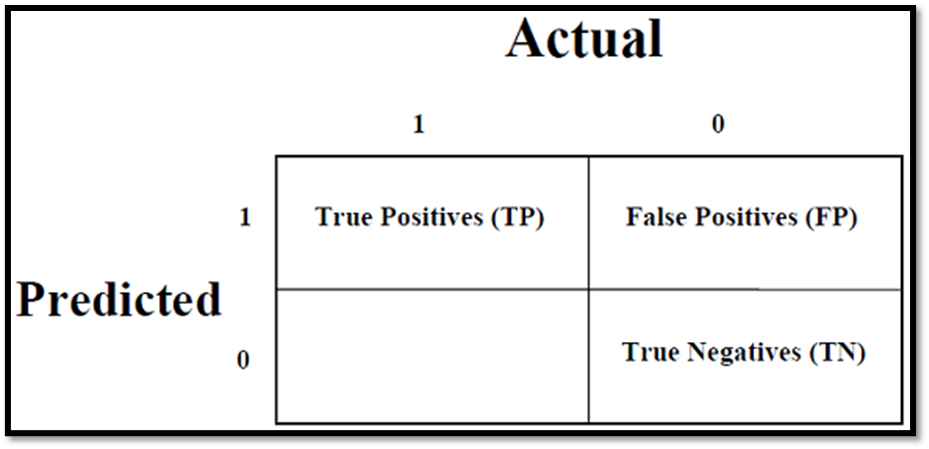
Confusion Matrix picture is from https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_algorithms_performance_metrics.htm
<br>
<br>True Positives (TP): is the case where both the actual class and the predicted class are true.
<br>False Positives (FP): is the case where the actual class is false, and the predicted class is true.
<br>False Negatives (FN): is the case where the actual class is true, and the predicted class is false.
<br>True Negatives (TN): is the case where both the actual class and the predicted class are false.


Under- og overfitting: hvordan sørger i for, at jeres system ikke under- eller overfitter på jeres data?

## Under- and overfitting
What is underfitting, it is when a model isn’t able to obtain a low enough error value on a training set. Which means it would struggle or be unable to solve complex tasks. 

What is overfitting, it is when to large of a gap opens up between the training error and the test error. Which means if the capacity is high it can solve complex tasks, but if it is too high for the present task it may overfit.

So how can it be identified? A way is to visually plot the loss and accuracy metrics for both Validation and Training dataset and see where the performance metrics converge for both datasets.
Overfitting indicates that the model is too complex for the problem that it is solving, i.e., it has to many filters in case of CNN’s. This will cause the model to know the data to well and can cause poor performance against new data. This can be resolved through tuning the hyperparameters.

Regularization is a hyperparameter that can be tuned to help reduce overfitting, by placing a higher value on smaller weight matrices, which can lead to a simpler model. The most common types of regularization L1 and L2. These update the general cost function by adding the L1 or L2 to the function: Cost function=Loss+Regularization

L2 is known as weight decay, because it forces the weights to decay towards zero, but will never become zero.

L1 will penalize the absolute value of the weights, which means it can become zero. This is useful when trying to compress the model. Which is why we will use L2.

It can be used in the Conv2D() and Dense() functions by adding kernel_ regularizer=regularizers.l2(0.01) and the value 0.01 is the parameter that needs to be optimized.


Optimeringer og forbedringer: hvordan har i forbedret jeres system via optimeringsparametre (optimizers, regulizers) eller afsøgning af hyperparameterrummet?